In [108]:
import pandas as pd

In [109]:
churn_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/churn.csv.txt', parse_dates=['last_trip_date','signup_date'])

In [3]:
churn_data

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5.63,4.2,5.0,1.00,King's Landing,2014-06-05,iPhone,2014-01-25,0.0,0,False,100.0
49996,0.00,4.0,NaN,1.00,Astapor,2014-01-25,iPhone,2014-01-24,0.0,1,False,0.0
49997,3.86,5.0,5.0,1.00,Winterfell,2014-05-22,Android,2014-01-31,0.0,0,True,100.0
49998,4.58,3.5,3.0,1.00,Astapor,2014-01-15,iPhone,2014-01-14,0.0,2,False,100.0


In [110]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   avg_dist                50000 non-null  float64       
 1   avg_rating_by_driver    49799 non-null  float64       
 2   avg_rating_of_driver    41878 non-null  float64       
 3   avg_surge               50000 non-null  float64       
 4   city                    50000 non-null  object        
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   signup_date             50000 non-null  datetime64[ns]
 8   surge_pct               50000 non-null  float64       
 9   trips_in_first_30_days  50000 non-null  int64         
 10  luxury_car_user         50000 non-null  bool          
 11  weekday_pct             50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [111]:
last_date = churn_data.last_trip_date.max()
last_date

Timestamp('2014-07-01 00:00:00')

In [112]:
import datetime

In [113]:
cutoff_date = last_date - datetime.timedelta(30)

In [114]:
churn_data['churn'] = churn_data.last_trip_date.map(lambda d:'churn' if d < cutoff_date else 'not churn')

In [115]:
churn_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,not churn
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,churn
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,churn
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,not churn
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,churn


In [117]:
churn_data['subscription_days'] = churn_data.last_trip_date - churn_data.signup_date

In [118]:
churn_data['subscription_days'] = churn_data.subscription_days.dt.days

In [119]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   avg_dist                50000 non-null  float64       
 1   avg_rating_by_driver    49799 non-null  float64       
 2   avg_rating_of_driver    41878 non-null  float64       
 3   avg_surge               50000 non-null  float64       
 4   city                    50000 non-null  object        
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   signup_date             50000 non-null  datetime64[ns]
 8   surge_pct               50000 non-null  float64       
 9   trips_in_first_30_days  50000 non-null  int64         
 10  luxury_car_user         50000 non-null  bool          
 11  weekday_pct             50000 non-null  float64       
 12  churn                   50000 non-null  object

In [120]:
float_data = churn_data.select_dtypes(include=['float64','bool'])
float_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avg_dist              50000 non-null  float64
 1   avg_rating_by_driver  49799 non-null  float64
 2   avg_rating_of_driver  41878 non-null  float64
 3   avg_surge             50000 non-null  float64
 4   surge_pct             50000 non-null  float64
 5   luxury_car_user       50000 non-null  bool   
 6   weekday_pct           50000 non-null  float64
dtypes: bool(1), float64(6)
memory usage: 2.3 MB


In [207]:
from sklearn.impute import SimpleImputer
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2,f_classif,SelectKBest

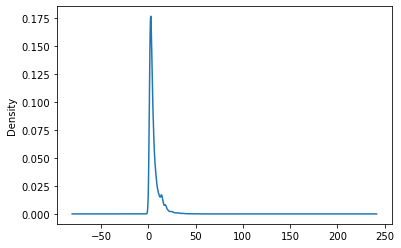

In [122]:
churn_data.avg_dist.plot.kde()

In [208]:
float_pipeline = make_pipeline(SimpleImputer(strategy='mean'),MinMaxScaler(),SelectKBest(k=4,score_func=f_classif))

In [166]:
cat_data = churn_data[['city','phone']]

In [167]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   city    50000 non-null  object
 1   phone   49604 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [168]:
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),OrdinalEncoder())

In [139]:
churn_data.churn.value_counts()

churn        31196
not churn    18804
Name: churn, dtype: int64

In [156]:
int_data = churn_data.select_dtypes(include=['int64'])
int_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   trips_in_first_30_days  50000 non-null  int64
 1   subscription_days       50000 non-null  int64
dtypes: int64(2)
memory usage: 781.4 KB


In [169]:
int_pipeline = make_pipeline(MinMaxScaler())

In [158]:
from sklearn.compose import make_column_transformer

In [209]:
preprocessor = make_column_transformer(
    (cat_pipeline,cat_data.columns),
    (float_pipeline,float_data.columns),
    (int_pipeline,int_data.columns)
)

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [210]:
pipeline = make_pipeline(preprocessor,RandomOverSampler(),RandomForestClassifier())

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
trainX, testX, trainY, testY = train_test_split(churn_data.drop(columns=['churn']),churn_data.churn)

In [211]:
pipeline.fit(trainX,trainY)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['city', 'phone'], dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler()),
                                       

In [212]:
pipeline.score(testX,testY)

0.9564

In [184]:
from sklearn.metrics import f1_score,confusion_matrix,recall_score

In [213]:
y_pred = pipeline.predict(testX)

In [214]:
confusion_matrix(y_pred=y_pred, y_true=testY)

array([[7427,  324],
       [ 221, 4528]], dtype=int64)

In [215]:
recall_score(testY,y_pred,average='micro')

0.9564

In [216]:
f1_score(testY,y_pred,average='micro')

0.9564

In [200]:
churn_data[churn_data.eq('Winterfell').any(1)].shape # find winterfell anywhere in dataframeb

(23336, 14)

In [201]:
from sklearn.model_selection import GridSearchCV

In [217]:
gs = GridSearchCV(pipeline,param_grid={'randomforestclassifier__n_estimators':[20,50,150,200]},cv=5,n_jobs =4)

In [218]:
gs.fit(trainX,trainY)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinalencoder',
                                                                                          OrdinalEncoder())]),
                                                                         Index(['city', 'phone'], dtype='object')),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                 

In [221]:
gs.best_score_

0.9560266666666667

In [220]:
gs.best_params_

{'randomforestclassifier__n_estimators': 150}